In [1]:
import pandas as pd
news=pd.read_table('r8-train-all-terms.txt',header=None,names = ["Class", "Text"])
news.head()

,Class,Text
0,earn,champion products ch approves stock split cham...
1,acq,computer terminal systems cpml completes sale ...
2,earn,cobanco inc cbco year net shr cts vs dlrs net ...
3,earn,am international inc am nd qtr jan oper shr lo...
4,earn,brown forman inc bfd th qtr net shr one dlr vs...


In [3]:
#Summarize the data by the news class
news.groupby('Class').describe()


Text                                                               
         count unique                                                top freq
Class                                                                        
acq       1596   1591  nippon life shearson tie up seen setting trend...    2
crude      253    245  opec within output ceiling subroto says opec r...    2
earn      2840   2835  anglo american aivj j year to dec shr cts vs f...    2
grain       41     41  adm grain elevator explodes in burlington iowa...    1
interest   190    176  fed adds reserves via customer repurchases the...    3
money-fx   206    195  sumita says bank will intervene if necessary b...    3
ship       108    105  agency reports ships waiting at panama canal t...    3
trade      251    239  nakasone to visit washington in late april pri...    2

In [4]:
#Select a subset from the dataframe. (crude money-fx trade)
subnews=news[(news.Class=="trade")| (news.Class=='crude')|(news.Class=='money-fx') ]

In [8]:
subnews.groupby('Class').describe()
print(subnews.shape)

(710, 2)


In [10]:
#Count the length of each document
length=subnews['Text'].apply(len)
subnews=subnews.assign(Length=length)
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limps to anniversar...,1134
43,crude,diamond shamrock dia cuts crude prices diamond...,532
55,crude,opec may have to meet to firm prices analysts ...,2558
76,crude,texaco canada cuts crude prices canadian cts b...,76
77,crude,texaco canada txc lowers crude postings texaco...,344


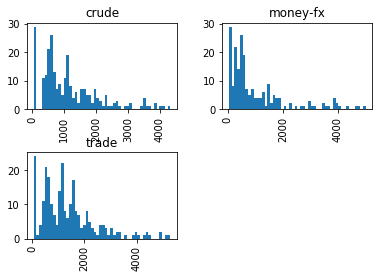

In [12]:
#Plot the distribution of the document length for each category
import matplotlib.pyplot as plt
%matplotlib inline
subnews.hist(column='Length',by='Class',bins=50)

plt.figure()




In [13]:
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limps to anniversar...,1134
43,crude,diamond shamrock dia cuts crude prices diamond...,532
55,crude,opec may have to meet to firm prices analysts ...,2558
76,crude,texaco canada cuts crude prices canadian cts b...,76
77,crude,texaco canada txc lowers crude postings texaco...,344


In [16]:
#Define preprocessing function

import nltk
from nltk.corpus import stopwords
newstopwords=stopwords.words("english") + ['yuhao','the','is','it','may']
WNlemma = nltk.WordNetLemmatizer()


def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens=[WNlemma.lemmatize(t) for t in tokens]
    tokens=[word for word in tokens if word not in newstopwords]
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [17]:
#Apply the function on each document
subnews['Text'] = subnews['Text'].apply(pre_process)


In [18]:
subnews.head()

,Class,Text,Length
15,trade,brazil anti inflation plan limp anniversary in...,1134
43,crude,diamond shamrock dia cut crude price diamond s...,532
55,crude,opec meet firm price analyst opec forced meet ...,2558
76,crude,texaco canada cut crude price canadian ct bbl ...,76
77,crude,texaco canada txc lower crude posting texaco c...,344


In [19]:
length=subnews['Text'].apply(len)
subnews=subnews.assign(Length=length)

In [23]:
subnews.head()
subnews.shape

(710, 3)

In [21]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(subnews.Text, subnews.Class, test_size=0.33, random_state=12)

In [22]:
#Create dtm by using word occurence

from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer( )

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(475, 6033)

In [24]:
count_vect.get_feature_names()

['aam',
 'ab',
 'abal',
 'abandon',
 'abdel',
 'abdelaziz',
 'abdul',
 'abdulaziz',
 'abdullah',
 'abide',
 'abiding',
 'ability',
 'able',
 'abroad',
 'abrupt',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'abu',
 'abundant',
 'abuse',
 'academic',
 'acccounts',
 'accelerate',
 'accelerated',
 'accelerating',
 'accentuating',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accession',
 'accident',
 'acclerated',
 'accommodating',
 'accommodation',
 'accomodations',
 'accompanied',
 'accompany',
 'accompanying',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'account',
 'accountable',
 'accounted',
 'accounting',
 'accredited',
 'accrued',
 'accuse',
 'accused',
 'achieve',
 'achieved',
 'achieves',
 'acid',
 'acknowledged',
 'acknowledging',
 'acknowleged',
 'acquire',
 'acquired',
 'acquiring',
 'acquisition',
 'acre',
 'acreage',
 'acrimony',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'activation',
 'active',
 'active

In [25]:
dtm1 = pd.DataFrame(X_train_counts.toarray().transpose(), index = count_vect.get_feature_names())
dtm1=dtm1.transpose()
dtm1.head()
#dtm1.to_csv('dtm1.csv',sep=',')

,aam,ab,abal,abandon,abdel,abdelaziz,abdul,abdulaziz,abdullah,abide,...,zero,zhao,zhou,zimbabwe,ziyang,zoete,zone,zubedei,zubeidi,zulia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a Naïve Bayes Model

In [26]:
#Create dtm by using Term Frequency. 
#Divide the number of occurrences of each word in a document 
#by the total number of words in the document: 
#these new features are called tf for Term Frequencies
#If set use_idf=True, which mean create dtm by using tf_idf

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(475, 6033)

In [28]:
#Building Modeling by using Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, y_train)

In [39]:
#Prediction on new documents
docs_new = ['Crude price is dropping, time to trade in it.', 'pay it to him']

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tf_transformer.transform(X_new_counts)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)
print(predicted)

['crude' 'crude']


In [41]:
#Build a pipeline: Combine multiple steps into one
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),  
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                    ])

In [42]:
#Use pipeline to train the model
text_clf.fit(X_train,y_train ) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [43]:
#Test model accuracy
import numpy as np
from sklearn import metrics 
predicted = text_clf.predict(X_test)
#np.mean(predicted == y_test) 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[76  1  2]
 [ 1 63 16]
 [ 0  0 76]]
0.9148936170212766


# Building a Decision Tree Model

In [44]:
#Decision Tree

from sklearn import tree
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', tree.DecisionTreeClassifier())
                    ])
text_clf.fit(X_train, y_train) 
predicted = text_clf.predict(X_test)

print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[75  3  1]
 [ 2 73  5]
 [ 1  5 70]]
0.9276595744680851


# Building a SVM Model

In [45]:
#SVM
from sklearn import svm
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', svm.LinearSVC(C=1.0))
                    ])

In [46]:
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [47]:
predicted = text_clf.predict(X_test)
 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )
#y_test.value_counts()

[[78  1  0]
 [ 0 74  6]
 [ 1  1 74]]
0.9617021276595744


In [48]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

      crude       0.99      0.99      0.99        79
   money-fx       0.97      0.93      0.95        80
      trade       0.93      0.97      0.95        76

avg / total       0.96      0.96      0.96       235



In [49]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[78  1  0]
 [ 0 74  6]
 [ 1  1 74]]


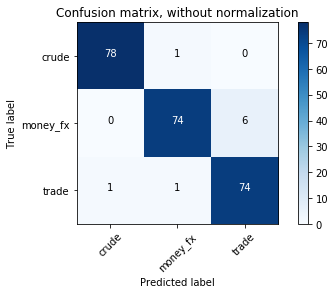

<Figure size 432x288 with 0 Axes>

In [35]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
cnf_matrix = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes=['crude','money_fx','trade'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()

# Introduce the GridSearch Method

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {
                  'tfidf__use_idf': (True, False),
                   'clf__C': (1, 0.5),
                }

#text_clf = Pipeline([('vect', CountVectorizer()),
#                    ('tfidf', TfidfTransformer(use_idf=True)),
#                      ('clf', SGDClassifier(
#                                            alpha=1e-3 
#                                             ))
#                    ])


In [51]:
# If we give this parameter a value of -1, 
#grid search will detect how many cores are installed and uses them all:

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__C: 1
tfidf__use_idf: True
